In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# Here for Customer 'C' -->0   and for 'Merchants' -->1
def change(name):
    if name[0] == 'C':
        return 0
    elif name[0] == 'M':
        return 1
    else:
        return name

df['nameOrig'] = df['nameOrig'].apply(change)
df['nameDest'] = df['nameDest'].apply(change)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 534.0+ MB


### Outlier Treatment

In [9]:
df.describe()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6362620.0,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,0.0,8.338831e+05,8.551137e+05,3.381461e-01,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,0.0,2.888243e+06,2.924049e+06,4.730786e-01,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,0.0,1.420800e+04,0.000000e+00,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,0.0,1.073152e+05,1.442584e+05,1.000000e+00,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,0.0,5.958504e+07,4.958504e+07,1.000000e+00,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
lower_limit=df.oldbalanceOrg.mean()-df.oldbalanceOrg.std()
upper_limit=df.oldbalanceOrg.mean()+df.oldbalanceOrg.std()

lower_limit1=df.newbalanceOrig.mean()-df.newbalanceOrig.std()
upper_limit1=df.newbalanceOrig.mean()+df.newbalanceOrig.std()

lower_limit2=df.oldbalanceDest.mean()-df.oldbalanceDest.std()
upper_limit2=df.oldbalanceDest.mean()+df.oldbalanceDest.std()

lower_limit3=df.newbalanceDest.mean()-df.newbalanceDest.std()
upper_limit3=df.newbalanceDest.mean()+df.newbalanceDest.std()

In [11]:
df1=df[((df.oldbalanceOrg>lower_limit) & (df.oldbalanceOrg<upper_limit)) & ((df.newbalanceOrig>lower_limit1) & (df.newbalanceOrig<upper_limit1)) & ((df.oldbalanceDest>lower_limit2) & (df.oldbalanceDest<upper_limit2)) & ((df.newbalanceDest>lower_limit3) & (df.newbalanceDest<upper_limit3))]

In [12]:
df1.describe()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.539716e+06,5.539716e+06,5539716.0,5.539716e+06,5.539716e+06,5.539716e+06,5.539716e+06,5.539716e+06,5.539716e+06,5.539716e+06
mean,2.428429e+02,1.417757e+05,0.0,1.543592e+05,1.651501e+05,3.883179e-01,4.984635e+05,5.967578e+05,1.260895e-03,1.263603e-06
std,1.424225e+02,2.407118e+05,0.0,4.804491e+05,5.123832e+05,4.873676e-01,8.741551e+05,9.616435e+05,3.548669e-02,1.124100e-03
min,1.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,1.135038e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.370000e+02,5.692555e+04,0.0,1.090300e+04,0.000000e+00,0.000000e+00,1.488641e+04,1.187715e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,1.932944e+05,0.0,6.564645e+04,7.272540e+04,1.000000e+00,6.078611e+05,7.894875e+05,0.000000e+00,0.000000e+00
max,7.430000e+02,4.898524e+06,0.0,3.722093e+06,3.779161e+06,1.000000e+00,4.499873e+06,4.899091e+06,1.000000e+00,1.000000e+00


In [13]:
df1.shape

(5539716, 11)

### Treat multi-collinerity issue

<AxesSubplot:>

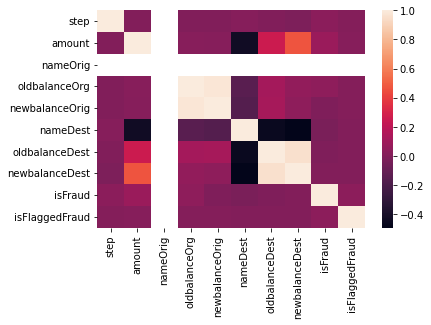

In [14]:
sns.heatmap(df1.corr())

In [15]:
# From the above it is found for moulti-collinerity so i have to drop 'oldbalanceOrg'and'oldbalanceDest'
df1.drop(['oldbalanceOrg','oldbalanceDest'],axis='columns',inplace=True)
df1.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,160296.36,1,0.0,0,0
1,1,PAYMENT,1864.28,0,19384.72,1,0.0,0,0
2,1,TRANSFER,181.00,0,0.00,0,0.0,1,0
3,1,CASH_OUT,181.00,0,0.00,0,0.0,1,0
4,1,PAYMENT,11668.14,0,29885.86,1,0.0,0,0


In [16]:
dummy = pd.get_dummies(df1.type,drop_first=True)
df2 =pd.concat([df1,dummy],axis=1)

In [17]:
df2.drop(['type'],axis=1,inplace=True)

In [18]:
df2.head()

,step,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,0,160296.36,1,0.0,0,0,0,0,1,0
1,1,1864.28,0,19384.72,1,0.0,0,0,0,0,1,0
2,1,181.00,0,0.00,0,0.0,1,0,0,0,0,1
3,1,181.00,0,0.00,0,0.0,1,0,1,0,0,0
4,1,11668.14,0,29885.86,1,0.0,0,0,0,0,1,0


In [19]:
X=df2.drop(['isFraud'],axis=1)
y=df2.isFraud

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)

In [21]:
# from sklearn.svm import SVC
# s=SVC()
# s.fit(X_train,y_train)
# s.score(X_train,y_train)                         #Taking too much time for large Dataset

In [23]:
from sklearn.svm import LinearSVC
ls = LinearSVC()
ls.fit(X_train,y_train)


LinearSVC()

In [25]:
ls.score(X_test,y_test)

0.9987400076104984

## Here after Cleaning and Removing Outlier and Removing Multi-collinearity , Remains variables are used in model Training .

### Key Variables are : 
step, amount, nameOrig, newbalanceOrig, nameDest, newbalanceDest, isFlaggedFraud, CASH_OUT, DEBIT, PAYMENT, TRANSFER

### What kind of prevention should be adopted while company update its infrastructure?

#### Smart Detection:
1. Use computer programs to spot unusual activity.
2. Watch for strange things happening right now.
3. Learn how people usually act online.

#### Strong Security:
1. Use multiple ways to prove who you are.
2. Check for weaknesses in your systems.
3. Keep your communication safe.
4. Teach your team about safety online.

#### Clear Rules:
1. Have clear rules about what to do when fraud happens.
2. Find out what could go wrong.
3. Work with banks to stop fraud.

#### Protect Data:
1. Keep important information safe.
2. Follow data privacy laws.
3. Hide sensitive information.

#### Always Learning:
1. Keep checking how well your fraud protection works.
2. Learn about new types of fraud.
3. Listen to feedback from customers and employees.

#### Assuming these actions have been implemented, how would you determine if they work?
1. **Check Fraud Levels:**
   - See how many times fraud happened and how much money was lost.
   - Understand the different types of fraud.

2. **Avoid False Alarms:**
   - Make sure good transactions aren't mistaken for bad ones.
   - Keep customers happy by avoiding unnecessary checks.

3. **Listen to Customers:**
   - Ask customers how they feel about fraud protection.
   - Use surveys and feedback to improve.

4. **System Health Check:**
   - See how fast the system can detect fraud.
   - Look for problems in the system.

5. **Train Your Team:**
   - Test employees on security knowledge.
   - Track mistakes made by employees.

6. **Partner Security Check:**
   - Make sure your partners are safe too.
   - Review their security practices.

7. **Follow the Rules:**
   - Obey data privacy and security laws.
   - Regularly check if you're following the rules.


### Save model:

In [27]:
import joblib
joblib.dump(ls, 'model.pkl')

['model.pkl']

In [28]:
loaded_model = joblib.load('model.pkl')